In [536]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [537]:
us_eco = pd.read_csv('US-Economy-Better-Worse-poll-responses.tsv',delimiter='\t',encoding='utf-8')

In [538]:
us_eco.head(200)

,Getting Better,Getting Worse,Undecided,Staying the Same,poll_slug,survey_house,start_date,end_date,question_text,sample_subpopulation,observations,margin_of_error,mode,partisanship,partisan_affiliation
0,25.0,25.0,13.0,36.0,yougov-economist-27828,YouGov/Economist,2017-06-11,2017-06-13,NaN,Adults,1500.0,3.1,Internet,Nonpartisan,None
1,24.0,28.0,16.0,32.0,yougov-economist-27791,YouGov/Economist,2017-06-04,2017-06-06,NaN,Adults,1500.0,3.2,Internet,Nonpartisan,None
2,26.0,29.0,14.0,31.0,yougov-economist-27758,YouGov/Economist,2017-05-27,2017-05-30,NaN,Adults,1500.0,3.1,Internet,Nonpartisan,None
3,25.0,26.0,15.0,34.0,yougov-economist-27725,YouGov/Economist,2017-05-20,2017-05-23,NaN,Adults,1500.0,3.0,Internet,Nonpartisan,None
4,40.0,15.0,5.0,40.0,arg-27715,ARG,2017-05-17,2017-05-20,NaN,Adults,1100.0,3.0,Live Phone,Nonpartisan,None
5,25.0,23.0,17.0,34.0,yougov-economist-27687,YouGov/Economist,2017-05-13,2017-05-16,NaN,Adults,1500.0,3.2,Internet,Nonpartisan,None
6,29.0,25.0,13.0,33.0,yougov-economist-27650,YouGov/Economist,2017-05-06,2017-05-09,NaN,Adults,1500.0,3.1,Internet,Nonpartisan,None
7,36.0,21.0,1.0,41.0,quinnipiac-27653,Quinnipiac,2017-05-04,2017-05-09,Do you think the nation's economy is getting b...,Registered Voters,1078.0,3.0,Live Phone,Nonpartisan,None
8,24.0,26.0,14.0,36.0,yougov-economist-27606,YouGov/Economist,2017-04-29,2017-05-02,NaN,Adults,1500.0,3.1,Internet,Nonpartisan,None
9,42.0,37.0,3.0,18.0,fox-27558,FOX,2017-04-23,2017-04-25,NaN,Registered Voters,1009.0,3.0,Live Phone,Nonpartisan,None


### Cleaning Data:<br> 


* Removing bad char from survey_house column for the purpose of proper visualization 

In [539]:
us_eco['survey_org'] = us_eco.survey_house


In [540]:
us_eco.head(3)

,Getting Better,Getting Worse,Undecided,Staying the Same,poll_slug,survey_house,start_date,end_date,question_text,sample_subpopulation,observations,margin_of_error,mode,partisanship,partisan_affiliation,survey_org
0,25.0,25.0,13.0,36.0,yougov-economist-27828,YouGov/Economist,2017-06-11,2017-06-13,NaN,Adults,1500.0,3.1,Internet,Nonpartisan,None,YouGov/Economist
1,24.0,28.0,16.0,32.0,yougov-economist-27791,YouGov/Economist,2017-06-04,2017-06-06,NaN,Adults,1500.0,3.2,Internet,Nonpartisan,None,YouGov/Economist
2,26.0,29.0,14.0,31.0,yougov-economist-27758,YouGov/Economist,2017-05-27,2017-05-30,NaN,Adults,1500.0,3.1,Internet,Nonpartisan,None,YouGov/Economist


In [541]:
us_eco['survey_org'] = us_eco['survey_org'].str.replace(' News', '')
us_eco['survey_org'] = us_eco['survey_org'].str.replace('YouGov/', '')

In [542]:
us_eco.survey_org.head(3)

0    Economist
1    Economist
2    Economist
Name: survey_org, dtype: object

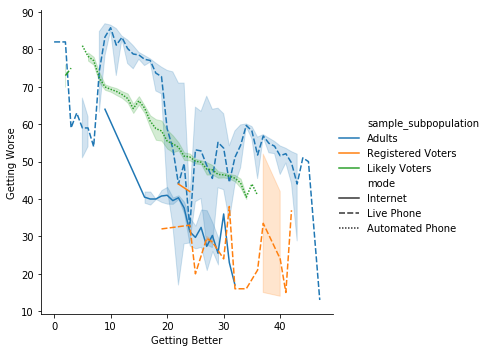

In [543]:
sns.relplot(x = "Getting Better", y = "Getting Worse", hue= "sample_subpopulation", facet_kws=dict(sharex=False),style="mode", kind="line", legend="full",  data = us_eco)

In [580]:

us_eco.end_date = pd.to_datetime(us_eco.end_date)
us_eco['year'] = us_eco.end_date.dt.year
us_eco.head()

,Getting Better,Getting Worse,Undecided,Staying the Same,poll_slug,survey_house,start_date,end_date,question_text,sample_subpopulation,observations,margin_of_error,mode,partisanship,partisan_affiliation,survey_org,year
0,25.0,25.0,13.0,36.0,yougov-economist-27828,YouGov/Economist,2017-06-11,2017-06-13,NaN,Adults,1500.0,3.1,Internet,Nonpartisan,None,Economist,2017
1,24.0,28.0,16.0,32.0,yougov-economist-27791,YouGov/Economist,2017-06-04,2017-06-06,NaN,Adults,1500.0,3.2,Internet,Nonpartisan,None,Economist,2017
2,26.0,29.0,14.0,31.0,yougov-economist-27758,YouGov/Economist,2017-05-27,2017-05-30,NaN,Adults,1500.0,3.1,Internet,Nonpartisan,None,Economist,2017
3,25.0,26.0,15.0,34.0,yougov-economist-27725,YouGov/Economist,2017-05-20,2017-05-23,NaN,Adults,1500.0,3.0,Internet,Nonpartisan,None,Economist,2017
4,40.0,15.0,5.0,40.0,arg-27715,ARG,2017-05-17,2017-05-20,NaN,Adults,1100.0,3.0,Live Phone,Nonpartisan,None,ARG,2017


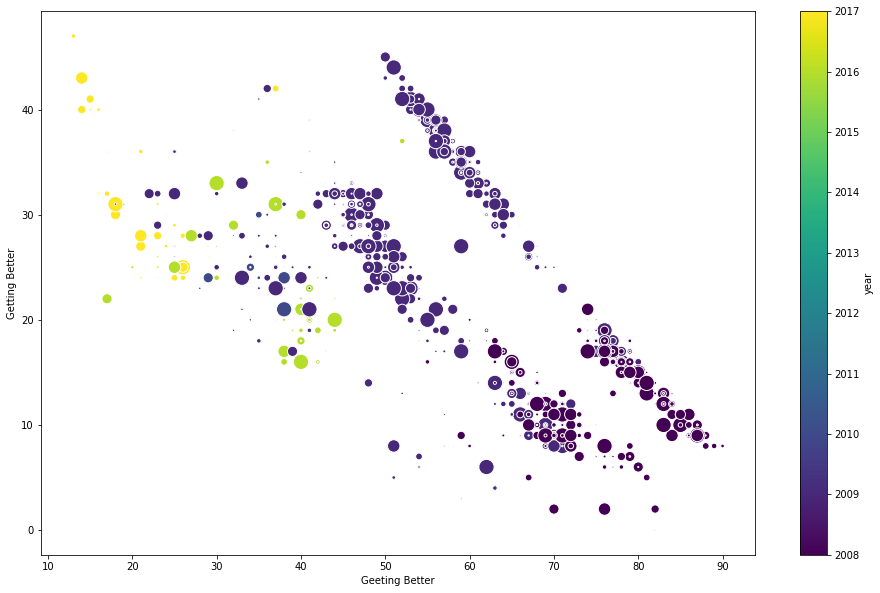

In [585]:
fig, ax = plt.subplots()
s = [1.2*1.5**n for n in range(len('Getting Better'))]
us_eco.plot.scatter(x='Getting Worse', y='Getting Better',c='year',s= s,colormap='viridis',figsize=(16,10),edgecolors='w', ax=ax)
ax.set_xlabel('Geeting Better')
plt.show()

### Let us see the survey result based on different survey house.

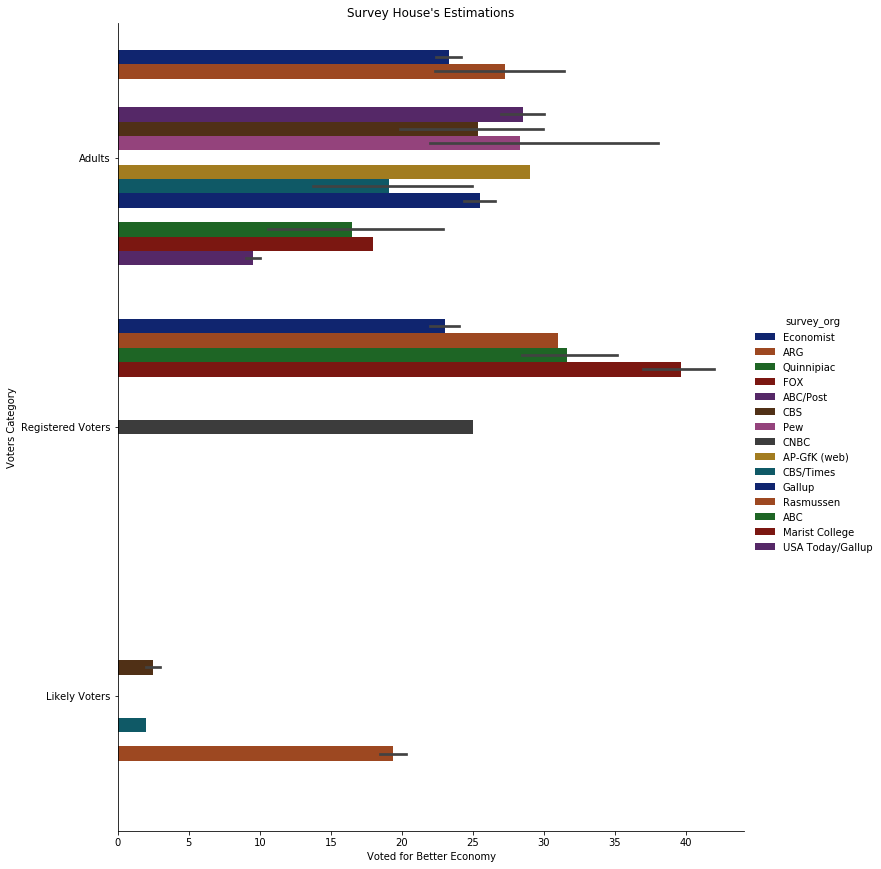

In [546]:
fig=sns.catplot('Getting Better', 'sample_subpopulation',hue='survey_org' ,data= us_eco,height=12, aspect=.9, palette='dark',kind='bar',legend=True)

plt.xlabel("Voted for Better Economy")
plt.ylabel("Voters Category")
plt.title("Survey House's Estimations") 
plt.show(fig)

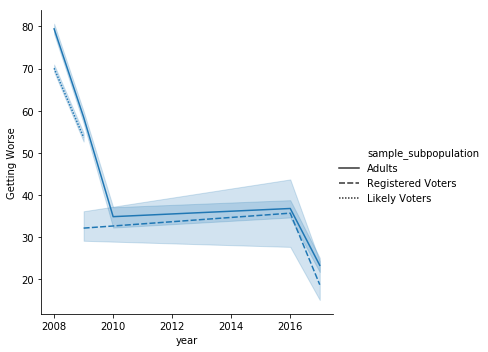

In [547]:
sns.relplot(x = 'year' , y = 'Getting Worse',style="sample_subpopulation", kind="line", legend="brief",  data = us_eco)

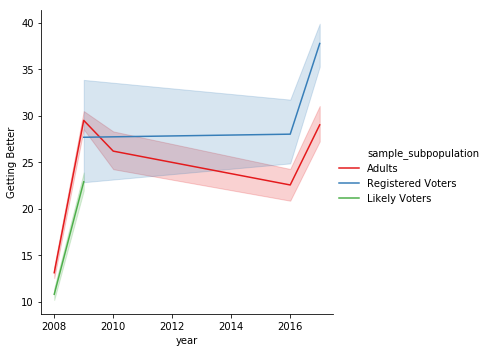

In [548]:
sns.relplot(x = 'year' , y = 'Getting Better',hue = "sample_subpopulation",kind="line", legend="brief", palette='Set1', data = us_eco)

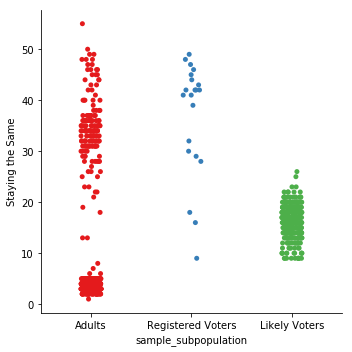

In [549]:
sns.catplot('sample_subpopulation','Staying the Same',data=us_eco,palette='Set1')

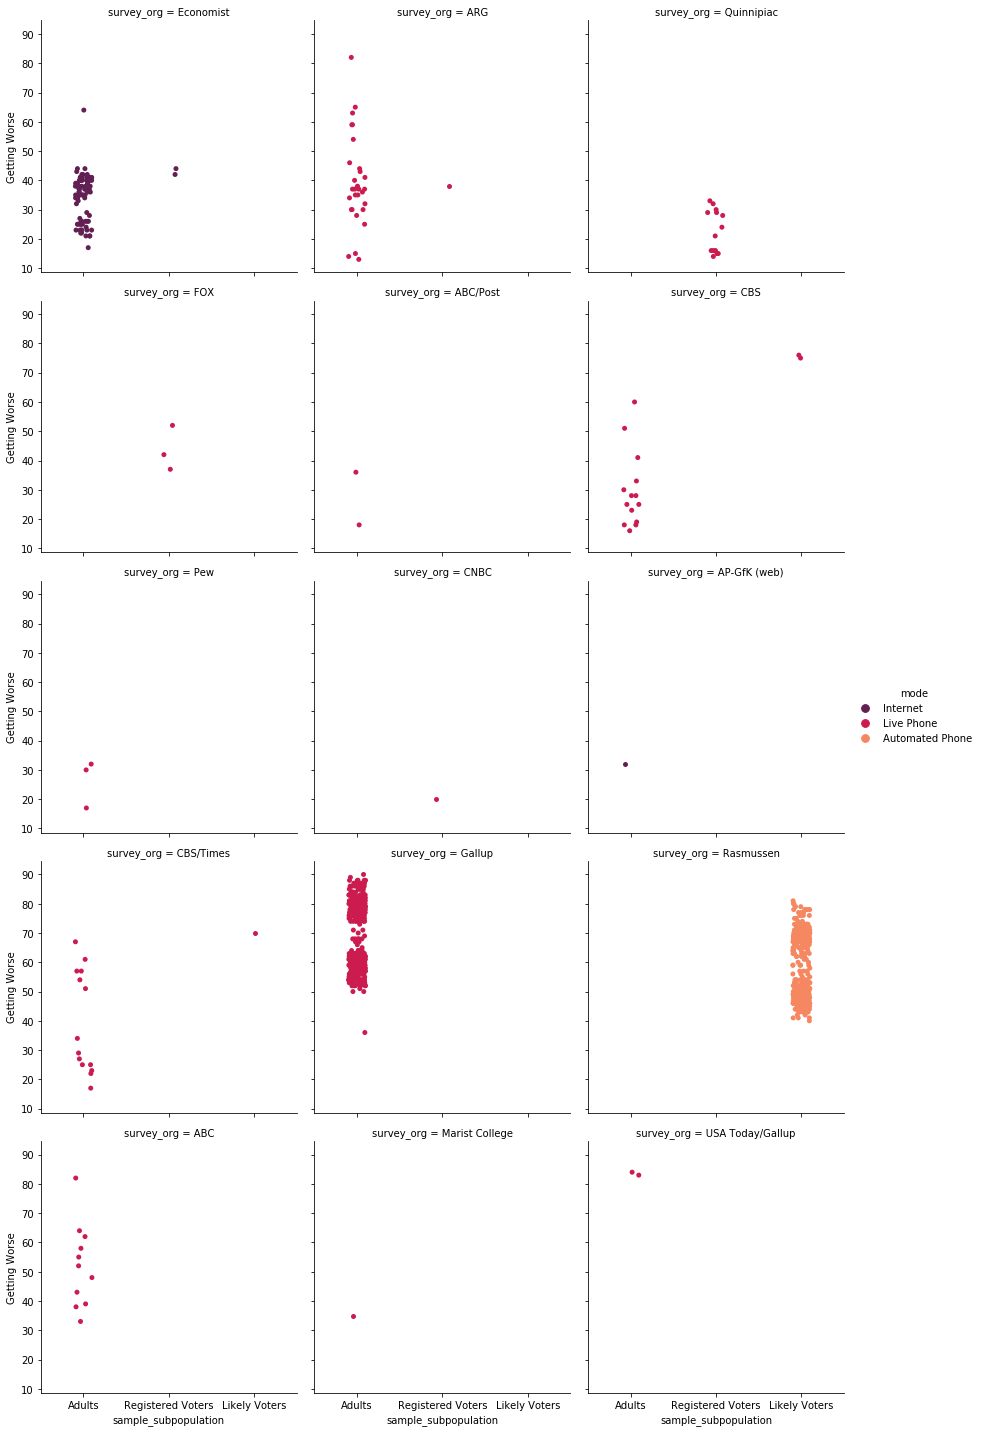

In [550]:

sns.catplot('sample_subpopulation','Getting Worse','mode',col='survey_org',col_wrap=3,data=us_eco,height=4, aspect=1,legend=True,palette='rocket')